# Reproducing Figure 2

In [1]:
###################
# Import packages #
###################

import arviz as az
import matplotlib.pylab as plt
import sys
sys.path.append('../code/')
from makeCorner import *

In [2]:
##############################
# Things related to plotting #
##############################

import matplotlib.pylab as plt
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"]="Times New Roman"
rc_fonts = {
"text.usetex": True,
}
plt.rcParams.update(rc_fonts)
plt.rcParams["figure.figsize"] = (8,6) 

import seaborn as sns
my_palette = sns.color_palette("colorblind")

In [3]:
data_GWB = az.from_netcdf("../data/O3_CBC_GWB_MD.cdf")
# az.summary(data_GWB) # Uncomment to see statistics of the parameters inferred during the parameter estimation run

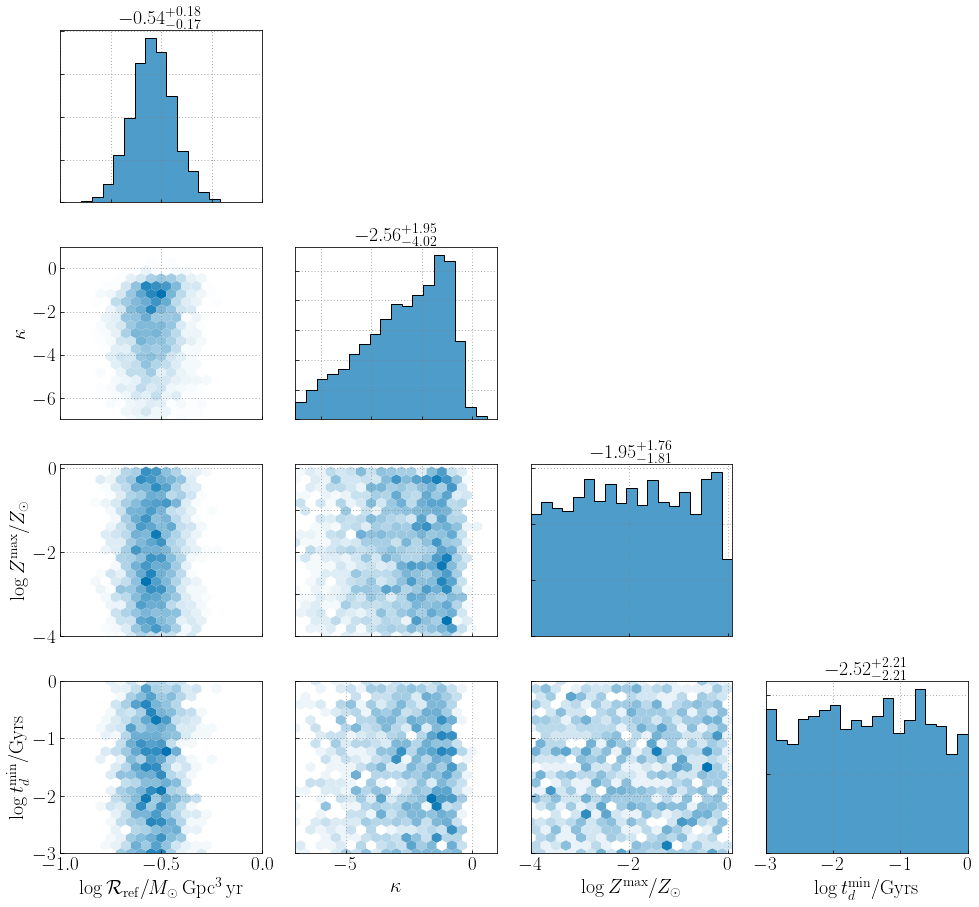

In [4]:
fig = plt.figure(figsize=(14,13))

stacked_samples = data_GWB.posterior.stack(draws=("chain", "draw"))
toPlot = {
    "logR20":{"data":stacked_samples.logR20,"plot_bounds":(-1,0),"label":r"$\log \mathcal{R}_{\rm ref}/M_\odot\,{\rm Gpc^{3}}\,{\rm yr}$"},
    "lambda_td":{"data":stacked_samples.lambda_td,"plot_bounds":(-7,1),"label":r"$\kappa$"},
    "logmetMin_td":{"data":stacked_samples.logmetMin_td,"plot_bounds":(-4,0.1),"label":r"$\log Z^{\rm max}/Z_\odot$"},
    "log_td_min":{"data":stacked_samples.log_td_min,"plot_bounds":(-3,0),"label":r"$\log t_d^{\rm min}$/Gyrs"}
}

plot_corner(fig,toPlot,color=my_palette[0],labelsize=18)
plt.tight_layout()
plt.show()